<a href="https://colab.research.google.com/github/flaviohds/mushroom_analysis/blob/main/Projeto_Final_mushroom_FHDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratória

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import random
# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [ ]:
df=pd.read_excel('mushrooms.xlsx')
df

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,stalk.root,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
0,BELL,SCALY,BUFF,BRUISES,NONE,FREE,CLOSE,BROAD,WHITE,ENLARGING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,TWO,PENDANT,GREEN,SEVERAL,GRASSES,POISONOUS
1,CONVEX,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,EQUAL,FIBROUS,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
2,FLAT,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,EQUAL,FIBROUS,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
3,CONVEX,FIBROUS,BROWN,NO,NONE,FREE,CLOSE,NARROW,BLACK,ENLARGING,EQUAL,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SOLITARY,URBAN,EDIBLE
4,FLAT,FIBROUS,BROWN,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,PINK,WHITE,ONE,PENDANT,BROWN,SOLITARY,WOODS,EDIBLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,FLAT,SMOOTH,BROWN,BRUISES,PUNGENT,FREE,CLOSE,NARROW,WHITE,ENLARGING,EQUAL,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BLACK,SCATTERED,URBAN,POISONOUS
5932,FLAT,SCALY,GRAY,NO,FOUL,FREE,CLOSE,BROAD,GRAY,ENLARGING,BULBOUS,SILKY,SILKY,BUFF,PINK,WHITE,ONE,LARGE,CHOCOLATE,SEVERAL,PATHS,POISONOUS
5933,FLAT,SCALY,YELLOW,BRUISES,ALMOND,FREE,CLOSE,BROAD,WHITE,ENLARGING,ROOTED,SMOOTH,SCALY,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SCATTERED,PATHS,EDIBLE
5934,FLAT,SCALY,GRAY,NO,FOUL,FREE,CLOSE,BROAD,GRAY,ENLARGING,BULBOUS,SILKY,SILKY,BROWN,PINK,WHITE,ONE,LARGE,CHOCOLATE,SOLITARY,GRASSES,POISONOUS


In [ ]:
#Mudando de "." para "_" e de "class" para "CLASS" para maior facilidade na 
#manipulação do dataframe
df.columns=['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat', 'CLASS']

In [ ]:
df.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,CLASS
count,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936
unique,6,4,8,2,7,2,2,2,9,2,4,4,4,7,7,2,3,4,6,6,6,2
top,CONVEX,FIBROUS,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
freq,2980,2300,1952,3184,3056,5912,4632,5208,1448,3136,3800,3876,3684,3416,3344,5928,5768,3488,2048,2184,2504,3768


##análise inicial

In [ ]:
!pip install pandas-profiling==2.8.0;

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Mushroom Data Profiling')
profile

#Apesar da matriz de correlação não poder ser utilizada diretamente para todas
#as variáveis, já que grande parte delas são categóricas não sequenciais como 
#cores ou odores, a matriz pode ser utilizada como uma pista para descobrir 
#os atributos mais significativos à comestibilidade ou não dos cogumelos.

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Nota-se também uma alta correlação entre as cores das três partes do cogumelo.
#Afim de reduzir o número de atributos, é interessante verificar se as três
#cores são atributos redundantes.
above_below=below_veil=above_veil=0
for i in range(df.shape[0]):
  if df.stalk_color_above_ring[i]==df.stalk_color_below_ring[i]:
    above_below+=1
  if df.stalk_color_below_ring[i]==df.veil_color[i]:
    below_veil+=1
  if df.stalk_color_above_ring[i]==df.veil_color[i]:
    above_veil+=1

print("número de registros de cores iguais:")
print("above e below ->"+str(above_below))
print("above e veil ->"+str(above_veil))
print("below e veil ->"+str(below_veil))

#Apesar de grande parte das espécies apresentarem uma única cor, mais de 30%
#dos registros ainda apresentam cores diferentes ao longo do cogumelo, logo, as 
#variáveis em questão não devem ser desconsideradas.

número de registros de cores iguais:
above e below ->3848
above e veil ->3424
below e veil ->3352


In [ ]:
df_edible=df[df.CLASS=='EDIBLE']
df_poisonous=df[df.CLASS=='POISONOUS']

In [ ]:
df_edible.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,CLASS
count,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768
unique,5,3,7,2,3,1,2,2,7,2,4,3,3,4,4,1,2,2,4,5,6,1
top,CONVEX,FIBROUS,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
freq,1852,1556,1144,2560,2968,3768,2576,3504,936,2848,1944,3204,3012,2600,2528,3768,3720,2672,1824,1096,1832,3768


In [ ]:
df_poisonous.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,CLASS
count,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168
unique,5,4,8,2,5,2,2,2,9,2,3,4,4,6,6,2,3,4,5,4,6,1
top,CONVEX,SCALY,GRAY,NO,FOUL,FREE,CLOSE,BROAD,PINK,ENLARGING,BULBOUS,SILKY,SILKY,WHITE,WHITE,WHITE,ONE,LARGE,CHOCOLATE,SEVERAL,GRASSES,POISONOUS
freq,1128,872,808,1544,1584,2144,2056,1704,640,1880,1856,1344,1296,816,816,2160,2048,1296,1584,1088,740,2168


In [ ]:
df.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,CLASS
count,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936
unique,6,4,8,2,7,2,2,2,9,2,4,4,4,7,7,2,3,4,6,6,6,2
top,CONVEX,FIBROUS,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
freq,2980,2300,1952,3184,3056,5912,4632,5208,1448,3136,3800,3876,3684,3416,3344,5928,5768,3488,2048,2184,2504,3768


In [ ]:
#Observando as 3 descrições acima nota-se que, seja nos cogumelos comestíveis 
#ou venenosos, a maioria dos atributos possuem menos ocorrências únicas do que
#no dataframe original.

##histogramas comparando cogumelos comestíveis e venenosos

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


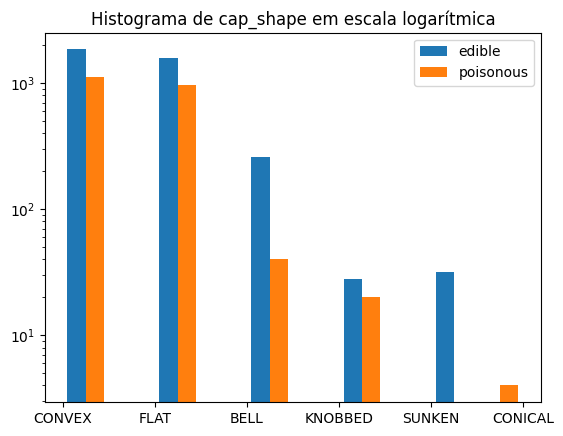

In [ ]:
atr='cap_shape'
plt.style.use('default')  #necessário porque o pandas profiling muda o style
                          #e causa erros nos gráficos
plt.hist([df_edible[atr],df_poisonous[atr]], log=1)
plt.title('Histograma de '+atr+' em escala logarítmica')
plt.legend(['edible', 'poisonous'])
plt.show()

#Nota-se que, apesar de servir apenas para uma pequena parte dos cogumelos, 
#pode-se afirmar que se um cogumelo tem a parte superior afundada ele é 
#necessariamente comestível. Usando a mesma lógica, caso o cogumelo tenha a 
#parte superior em formato cônico ele é venenoso. Além disso, se um cogumelo
#tem a parte superior em formato de sino, ele tem uma boa chance de ser
#comestível.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


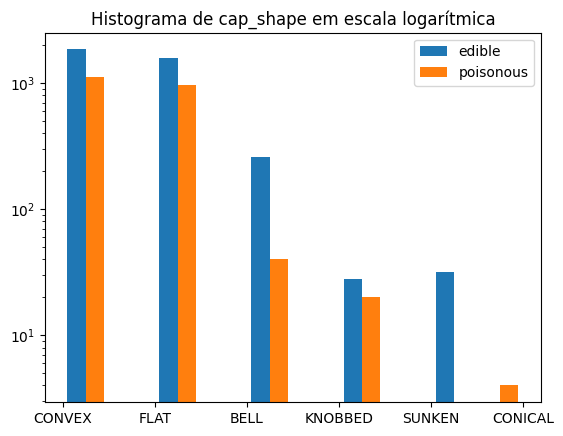

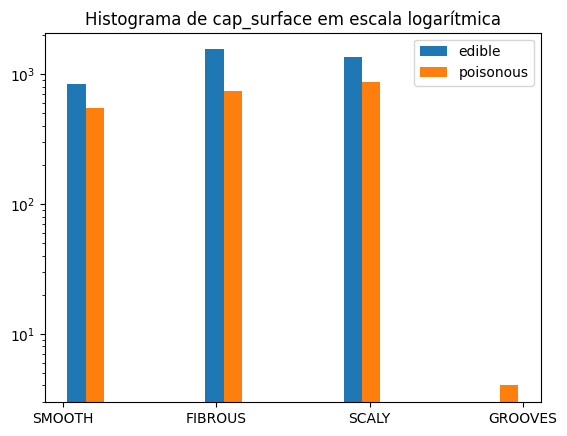

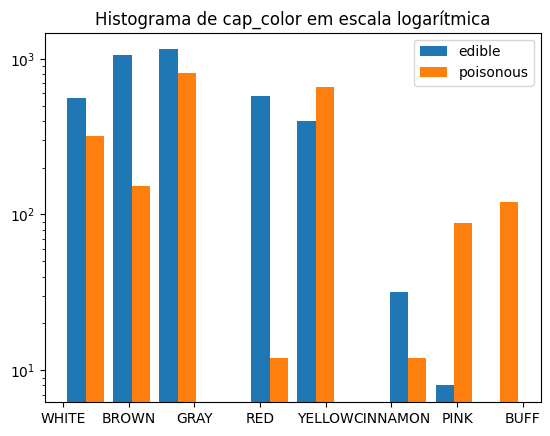

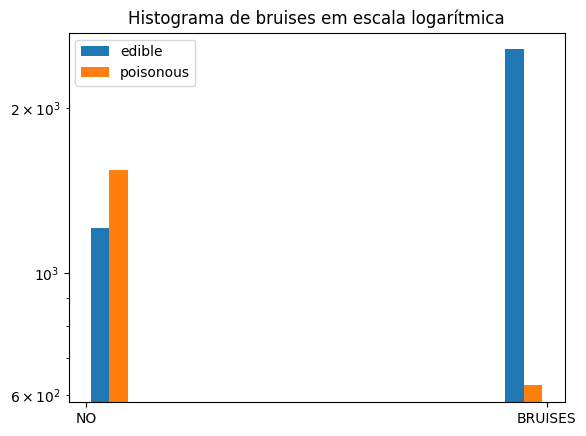

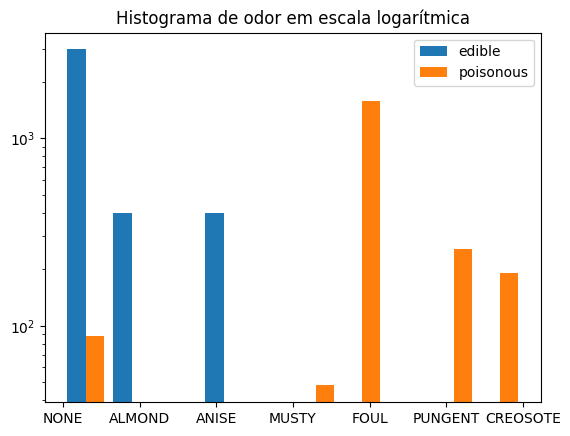

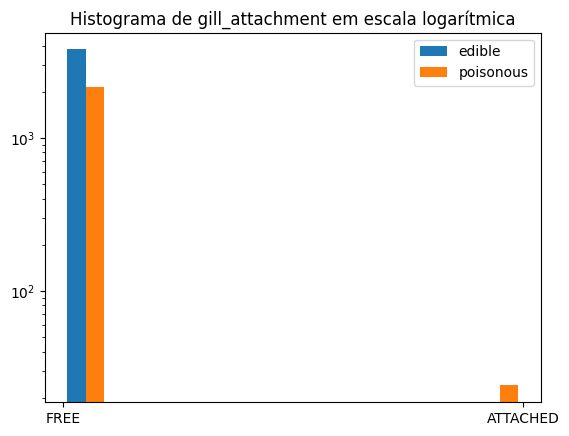

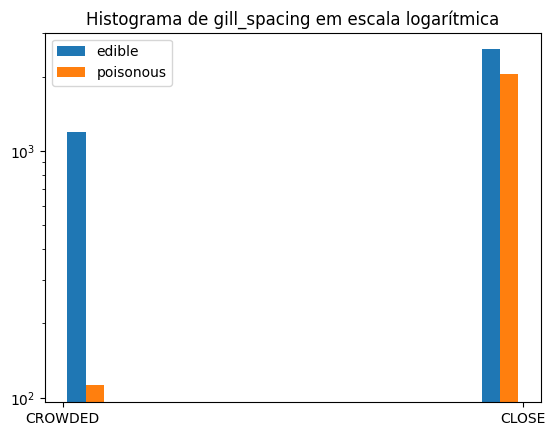

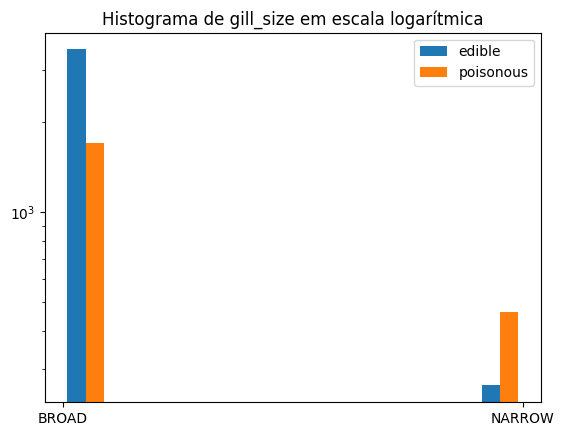

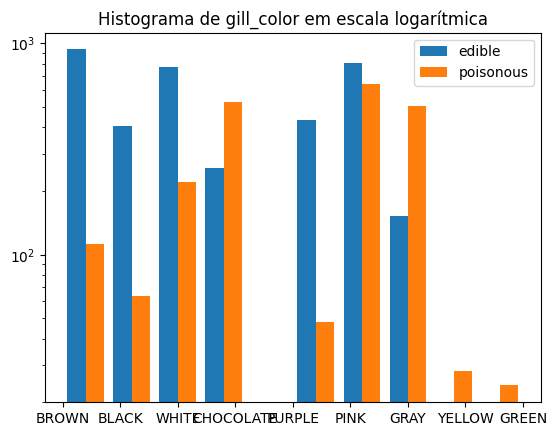

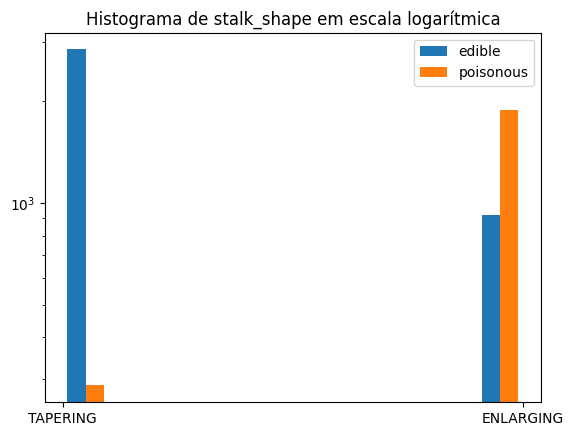

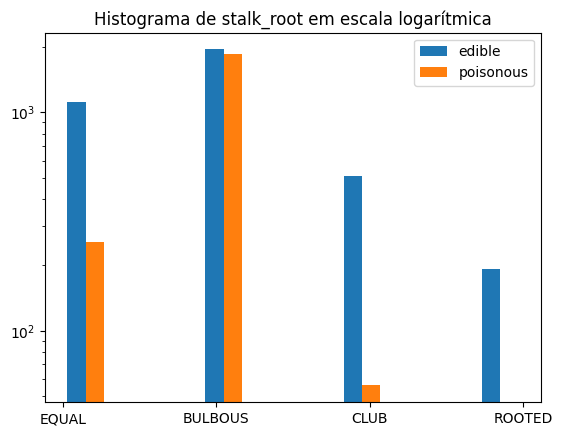

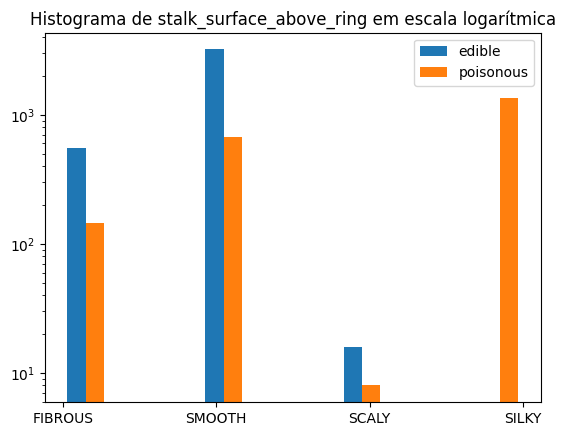

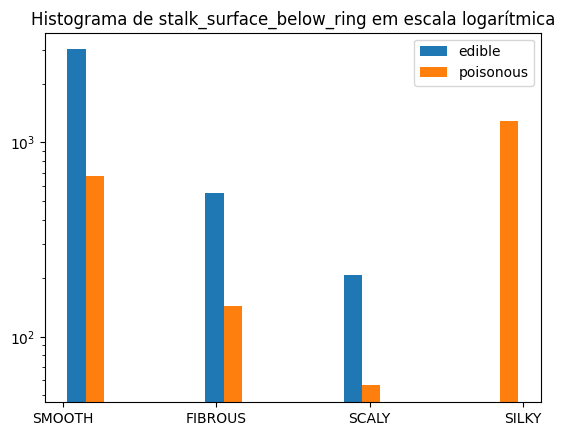

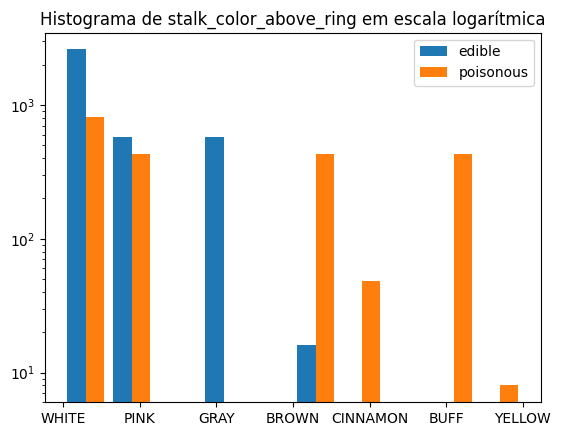

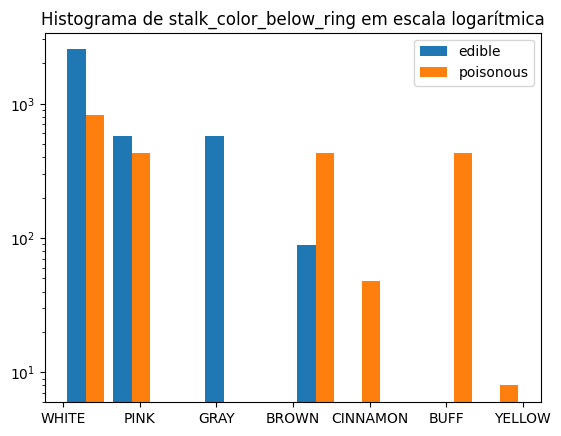

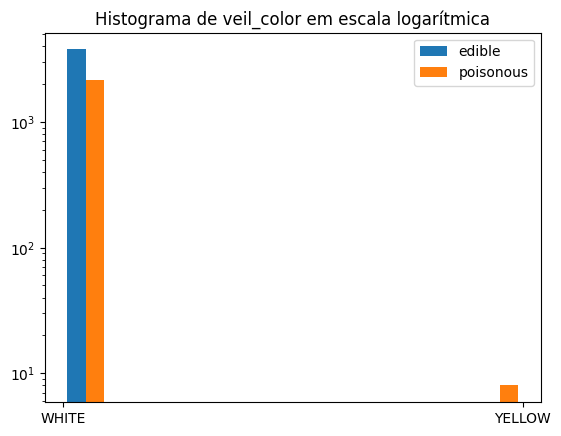

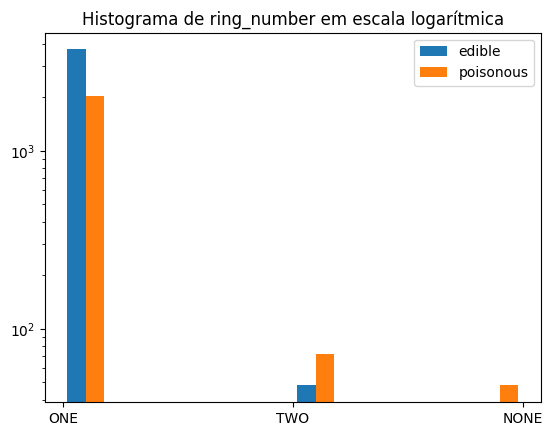

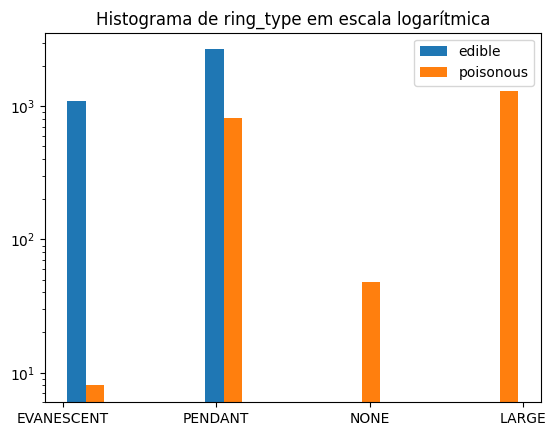

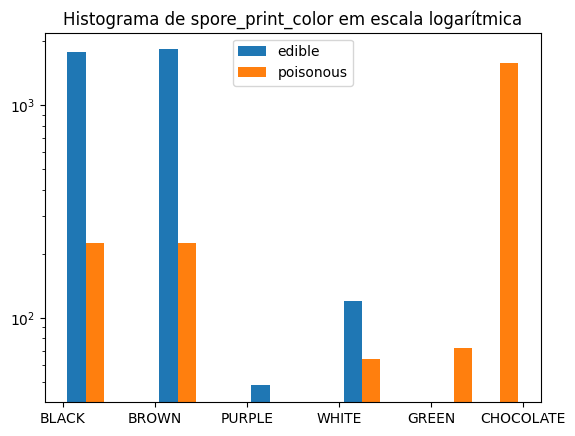

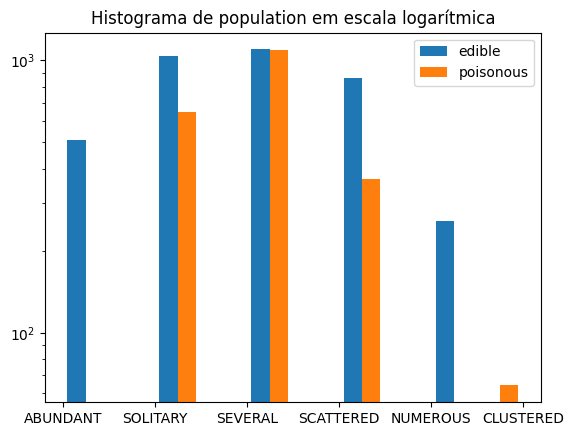

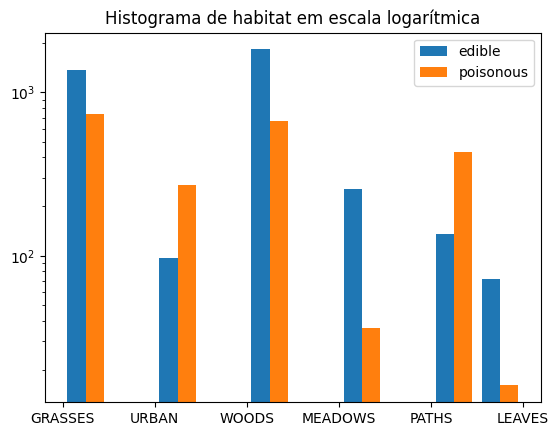

In [ ]:
for i in range(len(df.columns)-1):
  atr=df.columns[i]
  plt.hist([df_edible[atr],df_poisonous[atr]], log=1)
  plt.title('Histograma de '+atr+' em escala logarítmica')
  plt.legend(['edible', 'poisonous'])
  plt.show()
  print()

#Conclusão da análise exploratória

Apesar de não existir uma regra simples para a comestibilidade de um cogumelo,
através da vizualização dos histogramas acima é possível afirmar que certas
características, se presentes no cogumelo em questão, podem ser utilizadas para
determinar a comestibilidade ou não do mesmo. Por exemplo, a cor cinza na parte
central do cogumelo significa que ele é comestível com 100% de certeza de acordo
com essa base. Da mesma forma, algumas características podem indicar grande
probabilidade de comestibilidade, como o fato do cogumelo crescer em uma folha.
Com uma lógica análoga à comentada no primeiro gráfico, é possível fazer
inferências sobre a comestibilidade de um cogumelo, caso esse apresente certas
características específicas.

Porém, para a maioria dos casos, levar em consideração apenas uma característica
não leva a nenhuma conclusão segura sobre comer ou não um cogumelo. Para uma
análise mais profunda sobre a comestibilidade, é recomendado observar todos
os atributos e utilizá-los em um modelo de machine learning.

#Separação em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split 
x=df.loc[:,df.columns!='CLASS']
y=df.CLASS

#Como os algorítmos de machine learning do sklearn não conseguem lidar com dados
#categóricos em strings, é necessário tratar todas as colunas do nosso dataframe

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=True)
x_atributes=x.columns
x = pd.DataFrame(onehot.fit_transform(x).toarray())
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x.columns=onehot.get_feature_names(x_atributes)
x.head()

,cap_shape_BELL,cap_shape_CONICAL,cap_shape_CONVEX,cap_shape_FLAT,cap_shape_KNOBBED,cap_shape_SUNKEN,cap_surface_FIBROUS,cap_surface_GROOVES,cap_surface_SCALY,cap_surface_SMOOTH,cap_color_BROWN,cap_color_BUFF,cap_color_CINNAMON,cap_color_GRAY,cap_color_PINK,cap_color_RED,cap_color_WHITE,cap_color_YELLOW,bruises_BRUISES,bruises_NO,odor_ALMOND,odor_ANISE,odor_CREOSOTE,odor_FOUL,odor_MUSTY,odor_NONE,odor_PUNGENT,gill_attachment_ATTACHED,gill_attachment_FREE,gill_spacing_CLOSE,gill_spacing_CROWDED,gill_size_BROAD,gill_size_NARROW,gill_color_BLACK,gill_color_BROWN,gill_color_CHOCOLATE,gill_color_GRAY,gill_color_GREEN,gill_color_PINK,gill_color_PURPLE,...,stalk_color_above_ring_BUFF,stalk_color_above_ring_CINNAMON,stalk_color_above_ring_GRAY,stalk_color_above_ring_PINK,stalk_color_above_ring_WHITE,stalk_color_above_ring_YELLOW,stalk_color_below_ring_BROWN,stalk_color_below_ring_BUFF,stalk_color_below_ring_CINNAMON,stalk_color_below_ring_GRAY,stalk_color_below_ring_PINK,stalk_color_below_ring_WHITE,stalk_color_below_ring_YELLOW,veil_color_WHITE,veil_color_YELLOW,ring_number_NONE,ring_number_ONE,ring_number_TWO,ring_type_EVANESCENT,ring_type_LARGE,ring_type_NONE,ring_type_PENDANT,spore_print_color_BLACK,spore_print_color_BROWN,spore_print_color_CHOCOLATE,spore_print_color_GREEN,spore_print_color_PURPLE,spore_print_color_WHITE,population_ABUNDANT,population_CLUSTERED,population_NUMEROUS,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WOODS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

#Treinamento do modelo

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

def trainDT(X_train,y_train):
  model=tree.DecisionTreeClassifier(random_state=seed)
  model.fit(X_train, y_train);
  return model

def trainRF(X_train,y_train):
  model=RandomForestClassifier(random_state=seed)
  model.fit(X_train, y_train);
  return model

modelDT = trainDT(x_train, y_train)
modelRF = trainRF(x_train, y_train)

#Validação utilizando a base de teste

In [ ]:
def avaliar(X_test, y_test, model):

  y_pred = model.predict(X_test)

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred,average='micro') #argumento 'micro' necessário
  print('F1: ', f1)                             #porque y não é binário

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Inferido pelo modelo')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['EDIBLE', 'POISONOUS']) 
  ax.yaxis.set_ticklabels(['EDIBLE', 'POISONOUS']) 
  plt.show()

Acurácia:  1.0
Kappa:  1.0
F1:  1.0


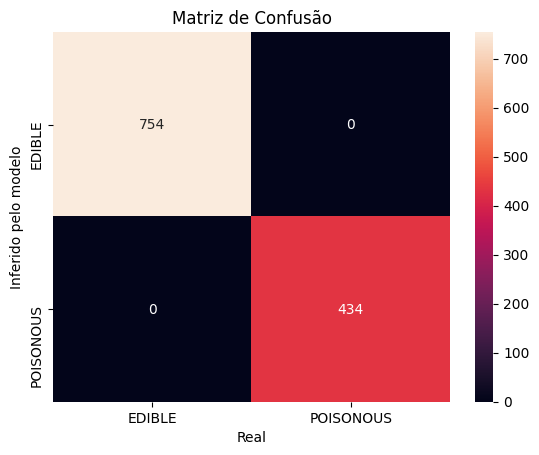

In [ ]:
avaliar(x_test, y_test, modelDT)

Acurácia:  1.0
Kappa:  1.0
F1:  1.0


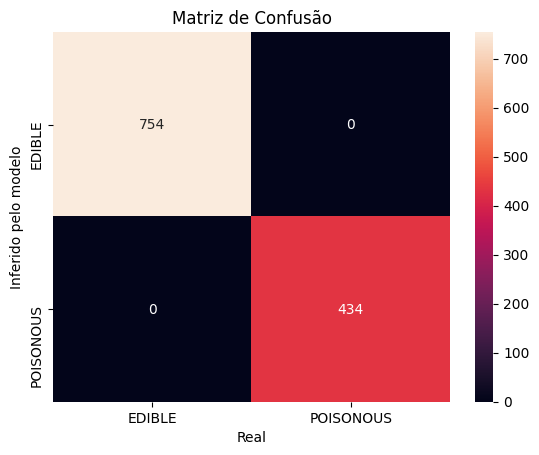

In [ ]:
avaliar(x_test, y_test, modelRF)

##verificação de possíveis erros

In [ ]:
#Como é suspeito um modelo perfeito sem nenhum tipo de ajuste, é necessário 
#fazer algumas verificações em possíveis fontes de erro de digitação:

Acurácia:  1.0
Kappa:  1.0
F1:  1.0


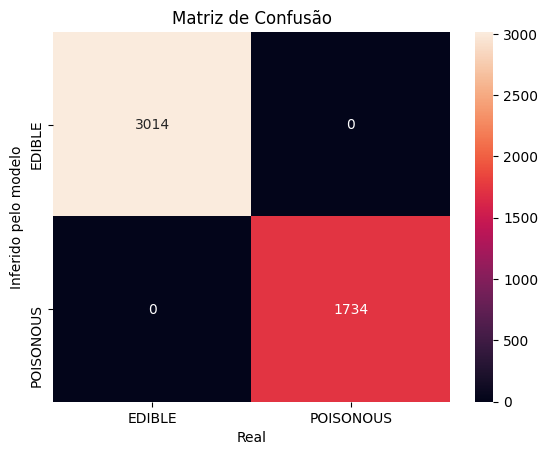


Acurácia:  1.0
Kappa:  1.0
F1:  1.0


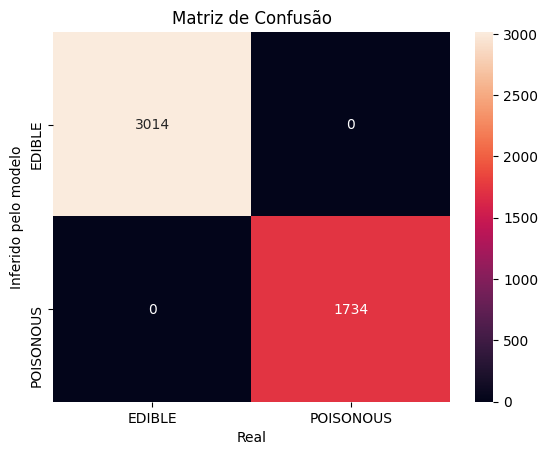

In [ ]:
#verificar se as partições de treino e teste não foram trocadas na hora da definição
avaliar(x_train, y_train, modelDT)
print()
avaliar(x_train, y_train, modelRF)

In [ ]:
#verificar se as partições de treino e teste não foram definidas iguais
x_train.head()

,cap_shape_BELL,cap_shape_CONICAL,cap_shape_CONVEX,cap_shape_FLAT,cap_shape_KNOBBED,cap_shape_SUNKEN,cap_surface_FIBROUS,cap_surface_GROOVES,cap_surface_SCALY,cap_surface_SMOOTH,cap_color_BROWN,cap_color_BUFF,cap_color_CINNAMON,cap_color_GRAY,cap_color_PINK,cap_color_RED,cap_color_WHITE,cap_color_YELLOW,bruises_BRUISES,bruises_NO,odor_ALMOND,odor_ANISE,odor_CREOSOTE,odor_FOUL,odor_MUSTY,odor_NONE,odor_PUNGENT,gill_attachment_ATTACHED,gill_attachment_FREE,gill_spacing_CLOSE,gill_spacing_CROWDED,gill_size_BROAD,gill_size_NARROW,gill_color_BLACK,gill_color_BROWN,gill_color_CHOCOLATE,gill_color_GRAY,gill_color_GREEN,gill_color_PINK,gill_color_PURPLE,...,stalk_color_above_ring_BUFF,stalk_color_above_ring_CINNAMON,stalk_color_above_ring_GRAY,stalk_color_above_ring_PINK,stalk_color_above_ring_WHITE,stalk_color_above_ring_YELLOW,stalk_color_below_ring_BROWN,stalk_color_below_ring_BUFF,stalk_color_below_ring_CINNAMON,stalk_color_below_ring_GRAY,stalk_color_below_ring_PINK,stalk_color_below_ring_WHITE,stalk_color_below_ring_YELLOW,veil_color_WHITE,veil_color_YELLOW,ring_number_NONE,ring_number_ONE,ring_number_TWO,ring_type_EVANESCENT,ring_type_LARGE,ring_type_NONE,ring_type_PENDANT,spore_print_color_BLACK,spore_print_color_BROWN,spore_print_color_CHOCOLATE,spore_print_color_GREEN,spore_print_color_PURPLE,spore_print_color_WHITE,population_ABUNDANT,population_CLUSTERED,population_NUMEROUS,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WOODS
2208,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1221,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3242,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
726,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_test.head()

,cap_shape_BELL,cap_shape_CONICAL,cap_shape_CONVEX,cap_shape_FLAT,cap_shape_KNOBBED,cap_shape_SUNKEN,cap_surface_FIBROUS,cap_surface_GROOVES,cap_surface_SCALY,cap_surface_SMOOTH,cap_color_BROWN,cap_color_BUFF,cap_color_CINNAMON,cap_color_GRAY,cap_color_PINK,cap_color_RED,cap_color_WHITE,cap_color_YELLOW,bruises_BRUISES,bruises_NO,odor_ALMOND,odor_ANISE,odor_CREOSOTE,odor_FOUL,odor_MUSTY,odor_NONE,odor_PUNGENT,gill_attachment_ATTACHED,gill_attachment_FREE,gill_spacing_CLOSE,gill_spacing_CROWDED,gill_size_BROAD,gill_size_NARROW,gill_color_BLACK,gill_color_BROWN,gill_color_CHOCOLATE,gill_color_GRAY,gill_color_GREEN,gill_color_PINK,gill_color_PURPLE,...,stalk_color_above_ring_BUFF,stalk_color_above_ring_CINNAMON,stalk_color_above_ring_GRAY,stalk_color_above_ring_PINK,stalk_color_above_ring_WHITE,stalk_color_above_ring_YELLOW,stalk_color_below_ring_BROWN,stalk_color_below_ring_BUFF,stalk_color_below_ring_CINNAMON,stalk_color_below_ring_GRAY,stalk_color_below_ring_PINK,stalk_color_below_ring_WHITE,stalk_color_below_ring_YELLOW,veil_color_WHITE,veil_color_YELLOW,ring_number_NONE,ring_number_ONE,ring_number_TWO,ring_type_EVANESCENT,ring_type_LARGE,ring_type_NONE,ring_type_PENDANT,spore_print_color_BLACK,spore_print_color_BROWN,spore_print_color_CHOCOLATE,spore_print_color_GREEN,spore_print_color_PURPLE,spore_print_color_WHITE,population_ABUNDANT,population_CLUSTERED,population_NUMEROUS,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WOODS
3167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4564,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1949,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Acurácia:  1.0
Kappa:  1.0
F1:  1.0


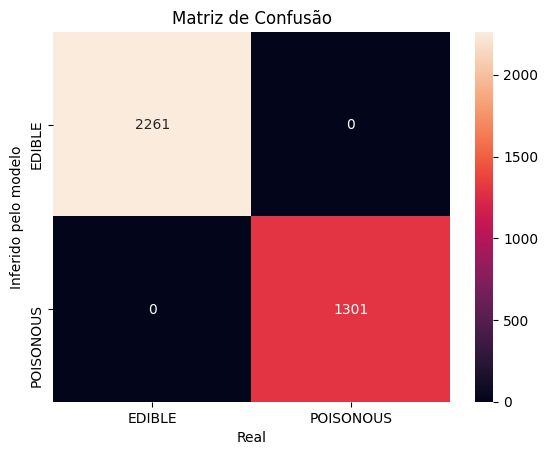


Acurácia:  1.0
Kappa:  1.0
F1:  1.0


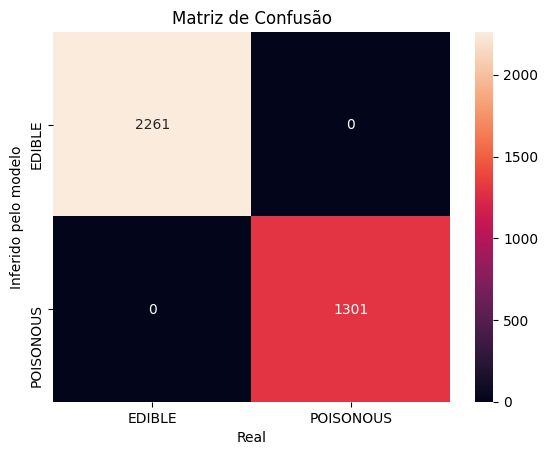

In [ ]:
#verificar se as ocorrências de mais simples dedução não caíram todas na parte
#de teste por algum azar na hora de particionar. Aumenta-se o tamanho do teste
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.6,stratify=y)
modelDT2 = trainDT(x2_train, y2_train)
modelRF2 = trainRF(x2_train, y2_train)
avaliar(x2_test, y2_test, modelDT2)
print()
avaliar(x2_test, y2_test, modelRF2)

In [ ]:
y_train.value_counts()

EDIBLE       3014
POISONOUS    1734
Name: CLASS, dtype: int64

In [ ]:
asdd=sorted(y_train.unique())
asdd

['EDIBLE', 'POISONOUS']

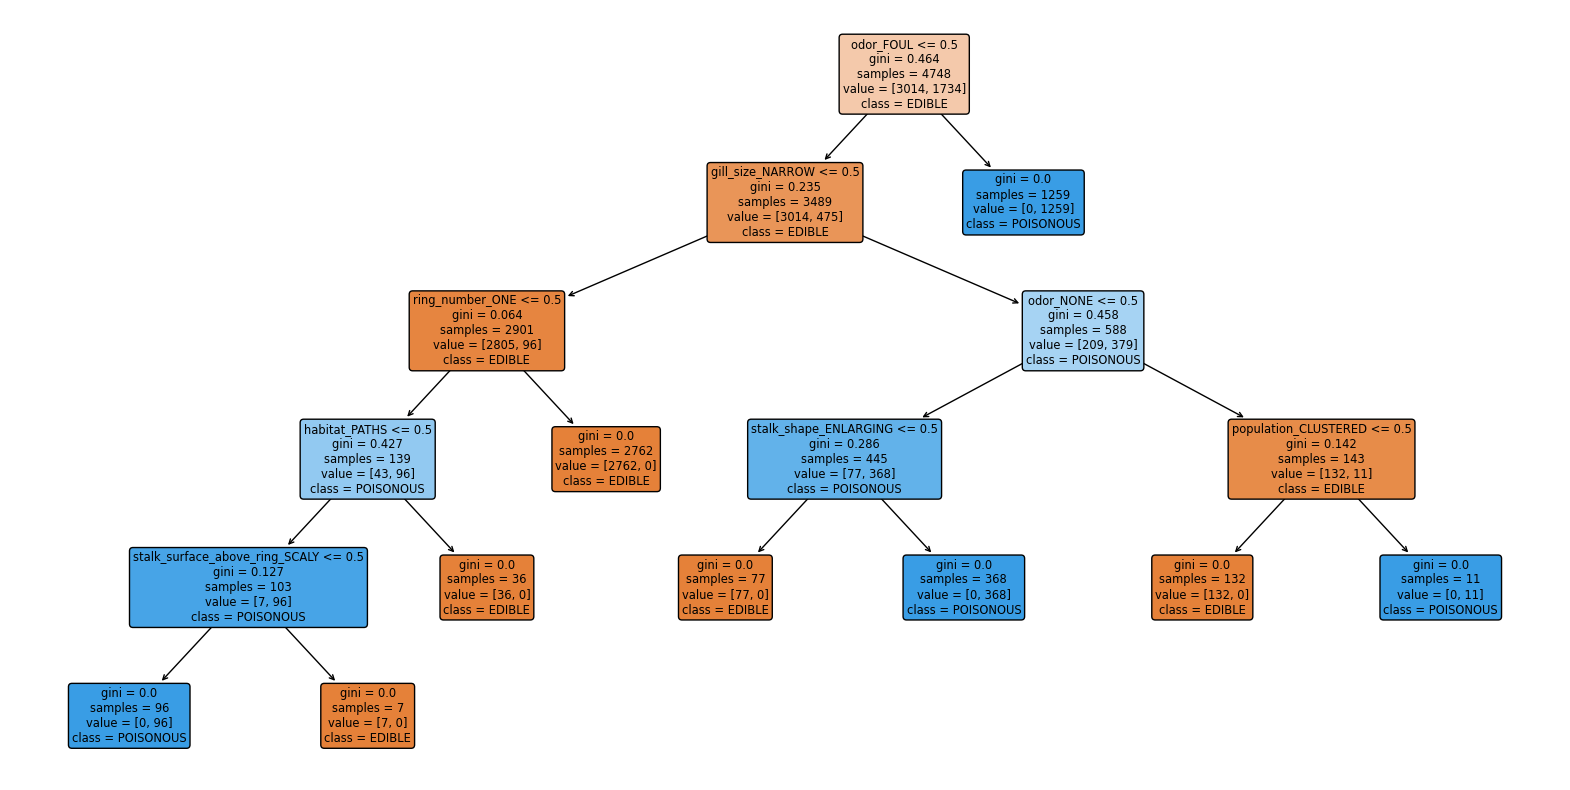

In [ ]:
#Como nenhum dos erros comuns foi detectado, suspeita-se que o problema de
#comestibilidade  de um cogumelo seja bem simples para os tipos de modelos que
#estão sendo estudados.
from sklearn.tree import plot_tree
plt.subplots(figsize=(20, 10))
plot_tree(modelDT, filled=True, rounded=True,
          class_names=sorted(y_train.unique()),feature_names=x.columns);
#Nota-se que a árvore de decisão é bem simples, com poucas folhas e apenas 6
#células de profundidade. O que significa que poucos atributos estão sendo
#utilizados.

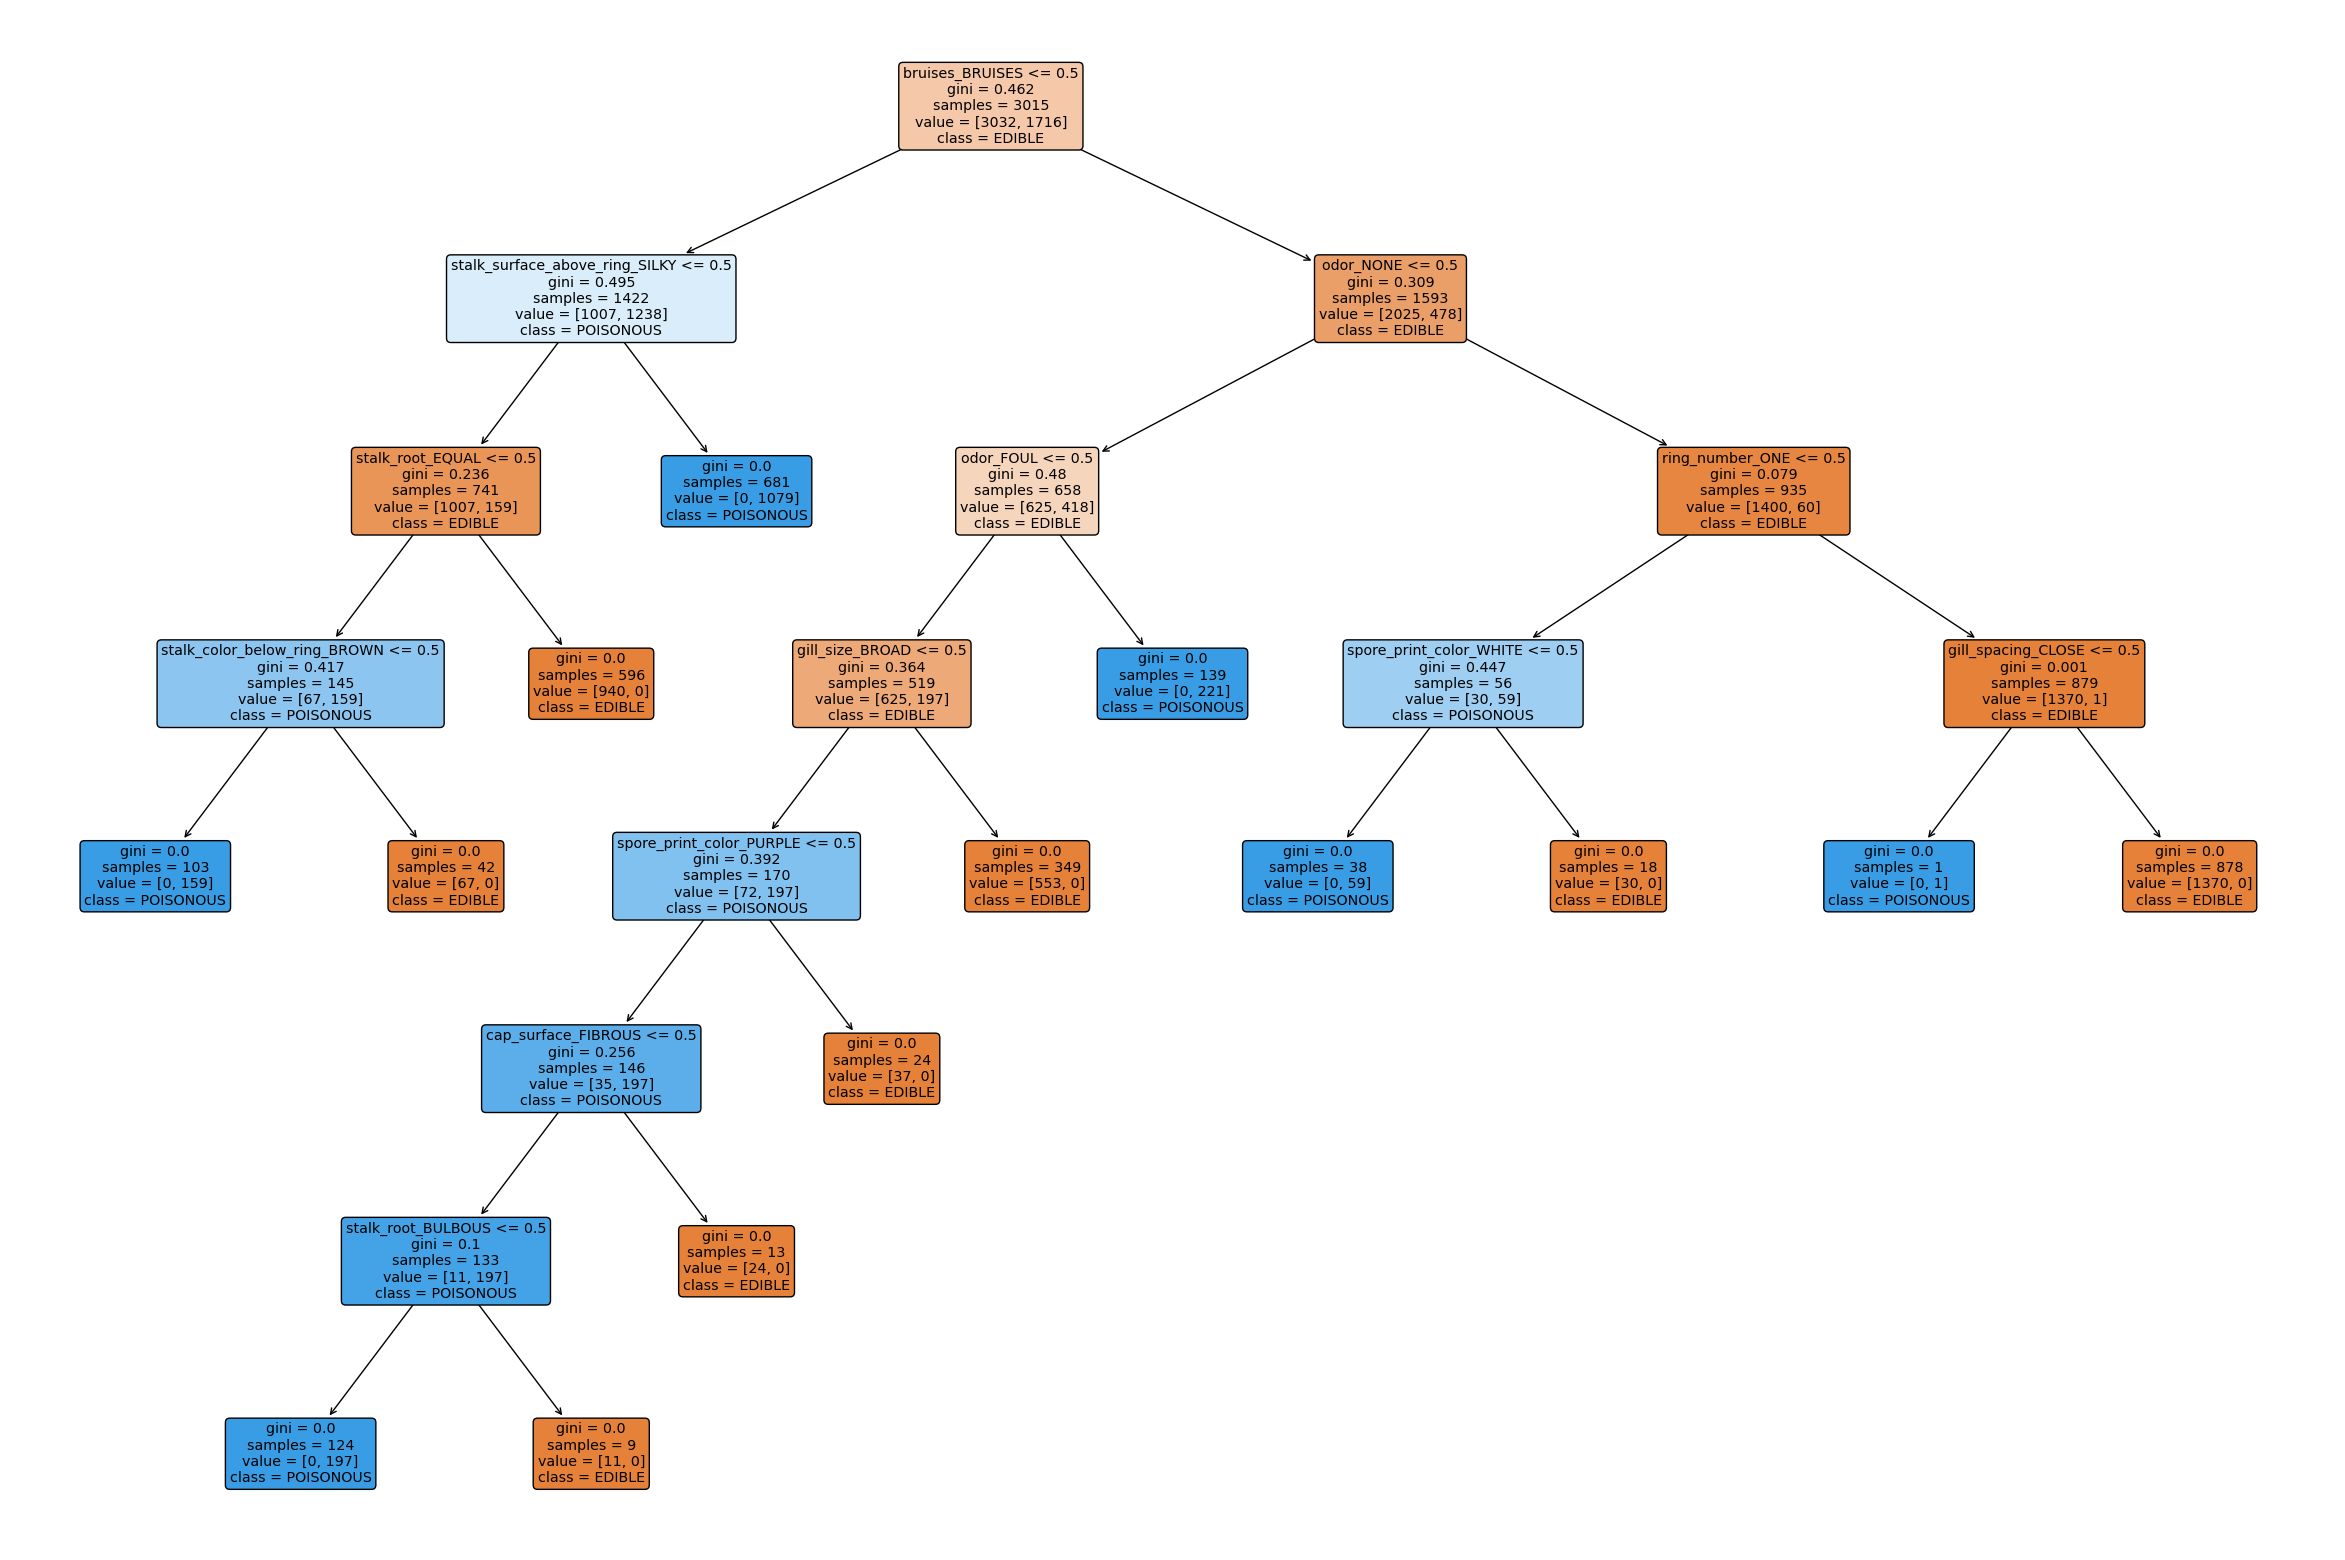

In [ ]:
#Como a random forest é um conjunto de árvores de decisão, não é tão simples
#analisar a complexidade do modelo ou do problema a partir de sua estrutura.
fig = plt.figure(figsize=(30, 20))
plot_tree(modelRF.estimators_[4],filled=True,rounded=True,
          class_names=sorted(y_train.unique()),feature_names=x.columns);

#Conclusão sobre os modelos de machine learning utilizados

Como pode ser visto pelos testes feitos nos modelos acima, o problema em questão era um problema simples para os modelos de machine learning utilizados,ao ponto que o modelo de árvore de decisão precisou de poucos atributos para obter bons resultados.Mesmo executando o programa diversas vezes com quantidade de dados para treino abaixo do normal, os modelos foram sempre capazes de acertar 100% do teste. Levando isso em consideração, não foi necessário o ajuste dos modelos já que estes já conseguiram o melhor resultado possível.

Também foi possível verificar as regras de decisão noos gráficos acima. É interessante observar que algumas das regras presentes poderiam ter sido concluídas a partir dos gráficos no final da análise exploratória. Ao mesmo tempo, as regras dos níveis inferiores das árvores levam em consideração mais de um atributo, fazendo com que não possam ser obtidas a partir dos gráficos feitos.

#Ajuste do modelo (parte não utilizada devido à acurácia de 100%)

In [ ]:
#Possíveis ajustes que seriam testados caso fosse necessário:
#-ajuste dos parâmetros do modelo
#-binarização simples de alguns atributos  em vez de usar o OneHotEncoder
#-usar OrdinalEncoder para os poucos atributos sequenciais

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from time import process_time

# tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 350, 500],
#                      'max_features': [3,4,6,8,11]}]

# print("# Tuning de hiper-parametros...")

# modelRFA = GridSearchCV(RandomForestClassifier(min_samples_leaf=5, n_jobs=-1), 
#                      tuned_parameters, n_jobs=-1,scoring='f1')

# tic = process_time()
# modelRFA.fit(x_train, y_train)
# toc = process_time()
# print('Tempo decorrido: ' + str(toc-tic) + 's')

In [ ]:
# model.best_params_

In [ ]:
# avaliar(x_test,y_test,modelRFA)